In [1]:
# importing essential libraries
import pandas as pd
import numpy as np

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


We can see Newspaper may have some outliers

Lets visualize then to chek it

## Visualization

In [6]:
# importing librarirs for visualization
import matplotlib.pyplot as plt
import seaborn as sns

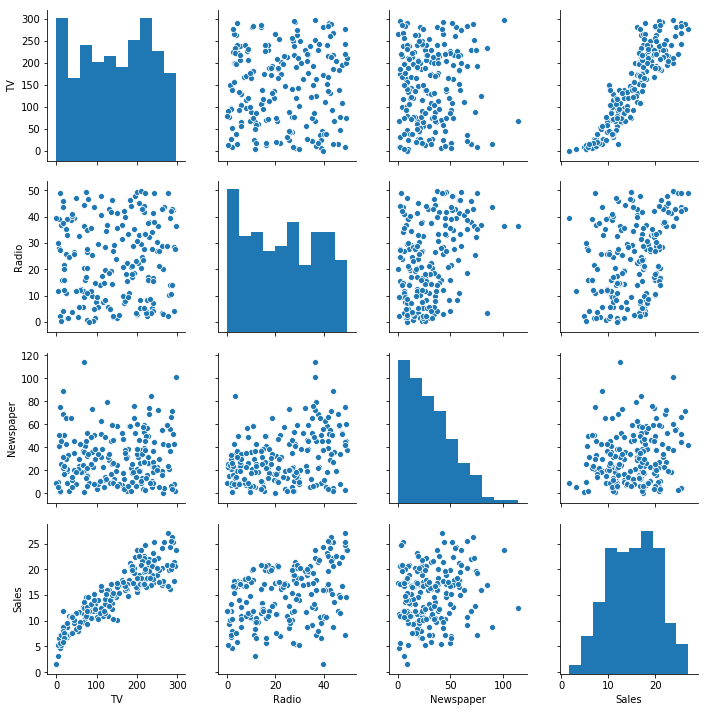

In [7]:
sns.pairplot(df)

Yup we are having few outliers but data set small so we can not remove them,
we will standardise them by MinMaxScaler

Let's check for their multicolinearity

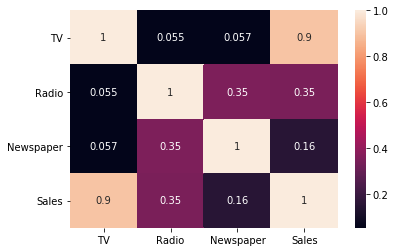

In [12]:
sns.heatmap(data = df.corr(), annot = True)

## Preprocessing

Data does not have any missing and categorical value to we will just standardise and then split it in training and testing data set

Let's split them first

In [35]:
# importing librarirs for spliting
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 104)

In [36]:
df_train.shape

(140, 4)

In [39]:
# import libraries for Rescalling data
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)

In [42]:
df_tr = pd.DataFrame(data = df_train, columns = ['TV', 'Radio', 'Newspaper', 'Sales'])

In [47]:
df_tr.head()

,TV,Radio,Newspaper
0,0.326460,0.194332,0.029024
1,0.787285,0.068826,0.743184
2,0.616838,0.425101,0.190853
3,0.589691,0.676113,0.337731
4,0.751203,0.048583,0.134565


#### Dividing into Dependent and Independent features

In [46]:
y_train = df_tr.pop('Sales')
X_train = df_tr

KeyError: 'Sales'

## Model 

In [51]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lm.fit()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
print(lm.intercept_)
print(lm.coef_)

0.013261363807013316
[0.72085709 0.24486836 0.02548909]


The equation we get is.

$ Sales = 0.0133 + 0.72* TV + 0.245*Radio + 0.025*Newspaper $

In [54]:
# Rescalling the test also
df_test = scaler.transform(df_test)

In [56]:
df_te = pd.DataFrame(data = df_test, columns = ['TV', 'Radio', 'Newspaper', 'Sales'])

In [57]:
y_test = df_te.pop('Sales')
X_test = df_te

## Prediction

In [58]:
pred = lm.predict(X_test)

In [59]:
pred.shape

(60,)

#### Evaluating Results

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, pred))

0.09158443615118325

In [63]:
r_squared = r2_score(y_test, pred)
r_squared

0.886960978694022

In [65]:
import pickle
# Saving model to disk
pickle.dump(lm, open('model.pkl','wb'))

In [71]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[17,45,70]]))

[25.07114454]
